# Mapa Argentina covid-19
- https://www.ign.gob.ar/NuestrasActividades/InformacionGeoespacial/CapasSIG

## Vamos con la simple primero, mapas de OSM de fondo

In [1]:
import plotly.express as px
import pandas as pd
px.set_mapbox_access_token(open(".mapbox_token").read())

In [5]:
sfe = pd.read_csv("data/arcovid19-SFe.csv", sep=";", decimal=",")
#last_date = sfe.iloc[len(sfe)-1,0]
#last_date = f"{last_date.split('-')[2]}/{last_date.split('-')[1]}/{last_date.split('-')[0]}"
last_date = "06/04/2020"
sfe.tail()

fecha localidad departamento   provincia    latitud   longitud  \
198  2020-04-06  Santa Fe   La Capital    Santa Fe -31.597238 -60.703039   
199  2020-04-06   Rosario      Rosario    Santa Fe -32.951583 -60.658914   
200  2020-04-06   Rosario      Rosario    Santa Fe -32.951583 -60.658914   
201  2020-04-06   Rosario      Rosario    Santa Fe -32.951583 -60.658914   
202  2020-04-05    Paraná          NaN  Entre Ríos -31.747241 -60.550068   

    condicion [r/i/f] tipo  edad genero  \
198               NaN  NaN   NaN    NaN   
199               NaN  NaN   NaN    NaN   
200               NaN  NaN   NaN    NaN   
201               NaN  NaN   NaN    NaN   
202                 i    a   NaN      F   

                                           descripción  
198                                                NaN  
199                                                NaN  
200                                                NaN  
201                                                NaN  
202  https://www.unoentrerios.com.ar/la-provincia/c...

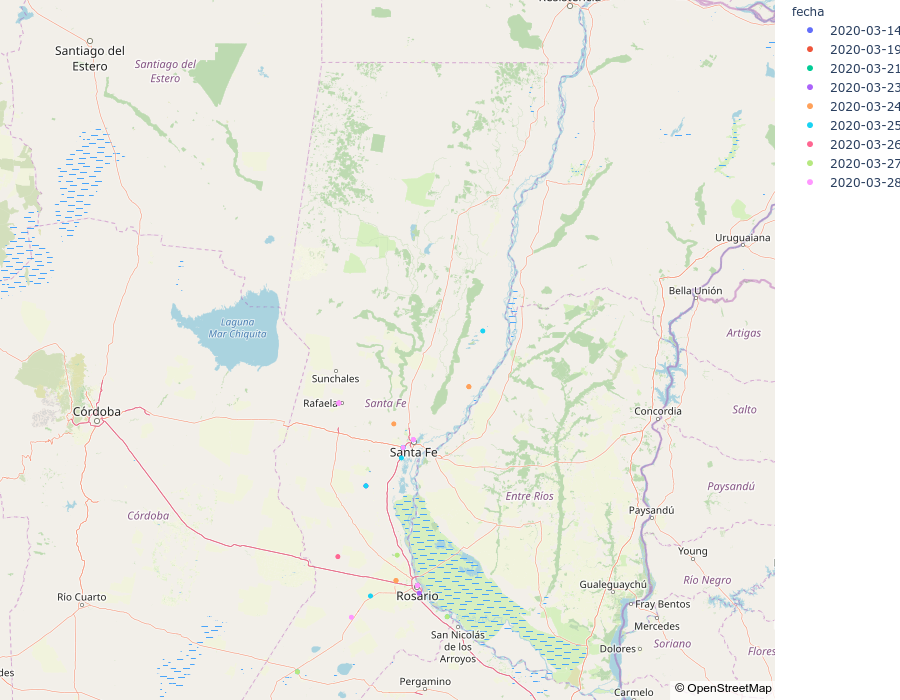

In [4]:
fig = px.scatter_mapbox(sfe, lat="latitud", lon="longitud", color="fecha",
                        width=500,height=700, zoom=6,
                        center={"lat":-30.754560,"lon":-60.987894},)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Mejoramos el mapa

Lo anterior no tiene mucho goyete porque superpone varios de los puntos, entonces vamos a hacer:

- Armar un nuevo dataframe a partir del anterior
- Va a tener una entrada por cada localidad y se le va a sumar la cantidad que hay de esa localidad
- Esa cantidad que hay por localidad nos va a servir para el tamaño del punto
- Para todo esto laburamos con `groupby`

¿Qué cosa creo que sería ideal?  No se, tal vez dividir por departamentos y mostrar con diferente intensidad cada depto

In [6]:
grupo_loca = sfe.groupby("localidad")
df_sfe_to_map = {"localidad":[], "departamento":[], "provincia":[], "latitud":[], "longitud":[], "casos":[]}
for localidad, df_localidad in grupo_loca:
    ind = sfe["localidad"] == localidad
    #una_loca = sfe[ind]
    sfe["casos"] = ""
    sfe.loc[ind,"casos"] = df_localidad.fecha.count()
    d = sfe[ind].iloc[0]
    df_sfe_to_map["localidad"].append(d["localidad"])
    df_sfe_to_map["departamento"].append(d["departamento"])
    df_sfe_to_map["provincia"].append(d["provincia"])
    df_sfe_to_map["latitud"].append(d["latitud"])
    df_sfe_to_map["longitud"].append(d["longitud"])
    df_sfe_to_map["casos"].append(d["casos"])

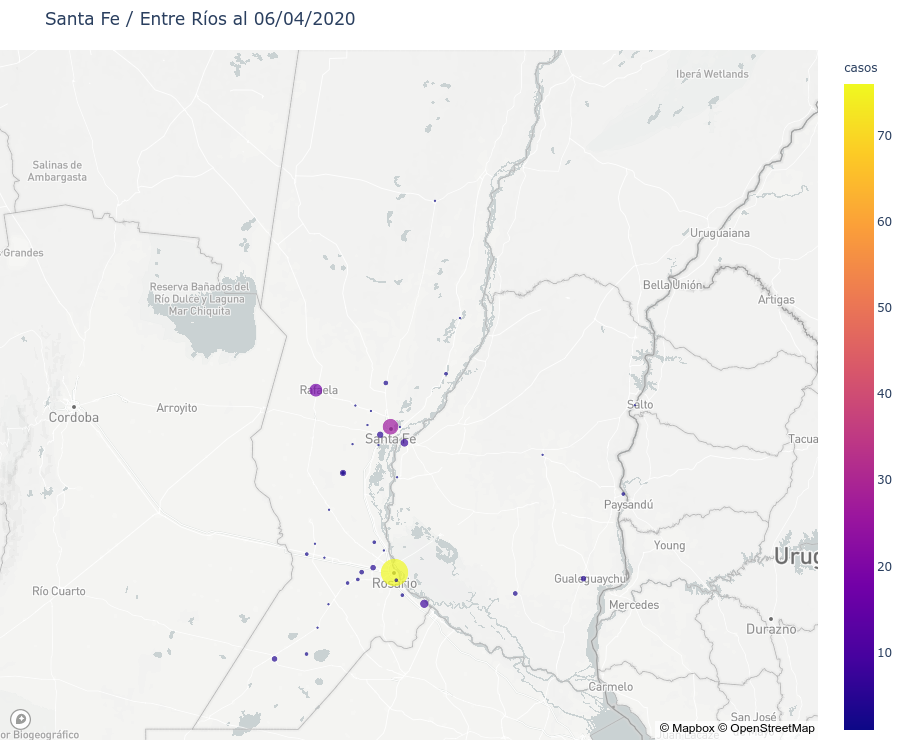

In [25]:
fig = px.scatter_mapbox(df_sfe_to_map, lat="latitud", lon="longitud", color="casos",
                        width=600,height=740, zoom=6.0, size="casos", hover_name="localidad",hover_data=["casos"],
                        center={"lat":-31.3,"lon":-60.5},
                        #labels={'departamento':'<b>Departamento</b>'},
                        #labels={'provincia':'<b>Provincia</b>'},
                        #color_continuous_scale=px.colors.cyclical.IceFire
                       )
fig.update_layout(title=f"Santa Fe / Entre Ríos al {last_date}",
                  mapbox_style="light", 
                  margin={"r":0,"t":50,"l":0,"b":0})
# mapbox_style=
# "white-bg", "carto-positron", "stamen-terrain", "stamen-toner" or "stamen-watercolor" 
#Allowed values
#    which do require a Mapbox API token are `'basic'`, `'streets'`,
#    `'outdoors'`, `'light'`, `'dark'`, `'satellite'`, `'satellite-streets'`.

fig.show(config={'displayModeBar': True})

In [27]:
fig.write_html("graphs/mapa_sfe.html", include_plotlyjs="cdn", full_html=False)

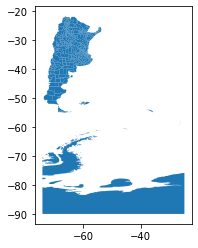

In [31]:
# probando geopandas
import geopandas as gpd
map_arg = gpd.read_file("data/departamento.json")
(map_arg["objeto"]=="Provincia").sum()
map_arg.plot()